In [33]:
import torch

print(torch.__version__)

2.6.0+cu126


In [34]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

print(len(X), len(Y))
X[:10], Y[:10]

50 50


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [35]:
##Splitting into training and testing
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

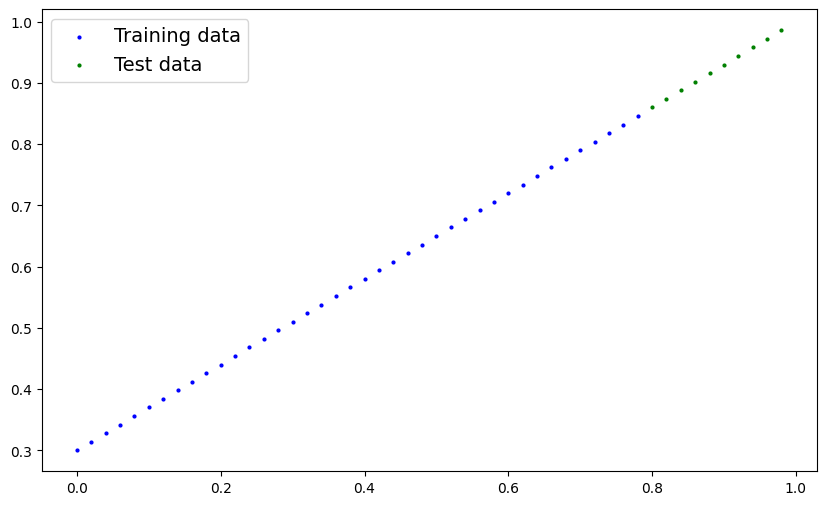

In [36]:
import matplotlib.pyplot as plt


def plot_prediction(
        train_data=X_train,
        train_label=Y_train,
        test_data=X_test,
        test_label=Y_test,
        predictions=None):
    plt.figure(figsize=(10, 6))
    #Plot training data in blue
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

    #Plot testing data in green
    plt.scatter(test_data, test_label, c="g", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()


plot_prediction();

BUILD MODEL

In [37]:
from torch import nn


#Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [38]:
#random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
model_0.state_dict()

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


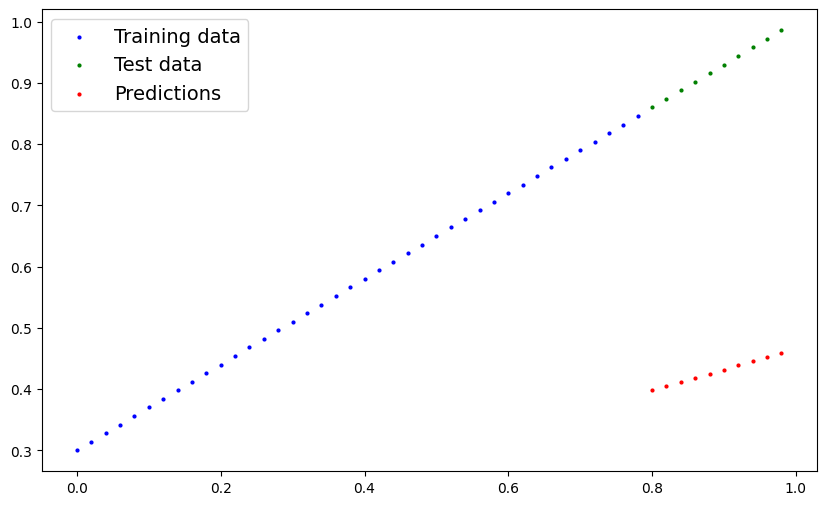

In [39]:
with torch.inference_mode():
    Y_preds = model_0(X_test)

print(Y_preds)
plot_prediction(predictions=Y_preds)

In [40]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [41]:
epochs = 200
epochs_counter = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()

    Y_preds = model_0(X_train)  # 1 forward pass
    loss = loss_fn(Y_preds, Y_train)  # 2 calculate the loss
    optimizer.zero_grad()  # 3 optimizer zero grad
    loss.backward()  # perform backpropagation on the loss wrt parameter of the model
    optimizer.step()  # step the optimizer
    model_0.eval()

    with torch.inference_mode():

        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, Y_test)

    if epoch % 10 == 0:
        epochs_counter.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

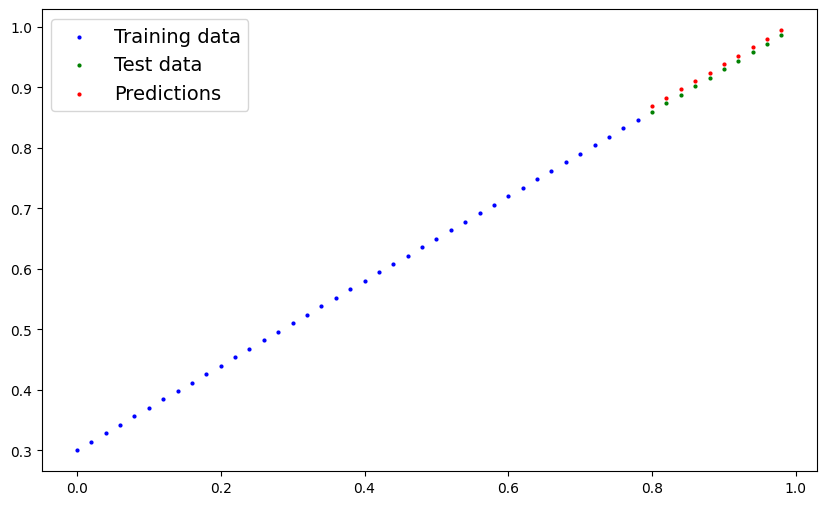

In [42]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_prediction(predictions=y_preds)

In [43]:
model_0.state_dict()


OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])